### **Installing Libraries**

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install imbalanced-learn


In [ ]:
!pip install category_encoders

In [ ]:
!pip install shap

In [ ]:
1pip install lime

### **Importing Libraries**

##### **Data Exploration**

In [1]:
import pandas as pd
import plotly.express as px
from ucimlrepo import fetch_ucirepo
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go


##### **Class Imbalance**

In [2]:
from imblearn.over_sampling import RandomOverSampler

##### **Preparing Data**

In [3]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

##### **Classifiers**

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



##### **Explainable AI**

In [5]:
import shap
from lime.lime_tabular import LimeTabularExplainer

##### **Neural Networks**

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### **Importing Dataset**

In [244]:
# Fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# Extract features and target
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets


In [245]:

# Concatenate features and target into a DataFrame
df = pd.DataFrame(X, columns=secondary_mushroom.data.feature_names)
df["target"] = y

### **Exploratory Data Analysis**

In [12]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [8]:
df.head(5)

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width  ...  \
0               e          NaN          w        16.95       17.09  ...   
1               e          NaN          w        17.99       18.19  ...   
2               e          NaN          w        17.80       17.74  ...   
3               e          NaN          w        15.77       15.98  ...   
4               e          NaN          w        16.53       17.20  ...   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season target  
0               NaN       d      w      p  
1               NaN       d      u      p  
2               NaN       d      w      p  
3               NaN       d      w      p  
4               NaN       d      w      p  

[5 rows x 21 columns]

In [9]:
df.shape

(61069, 21)

In [13]:
df.describe( )

cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000

In [111]:
df.nunique( )

cap-diameter            1381
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height              962
stem-width              2766
stem-root                  4
stem-surface               7
stem-color                12
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  7
spore-print-color          7
habitat                    8
season                     4
target                     2
dtype: int64

In [17]:
df.duplicated( ).sum()

146

In [18]:
df.isnull( ).sum( )

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
target                      0
dtype: int64

### **Data Imputation**

In [246]:
# replace '?' with NaN to represent missing values
df.replace('?', pd.NA, inplace=True)

In [247]:
df.describe()

cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000

In [248]:
# select the numerical features 
numerical_columns = df.select_dtypes(include=['number'])

# Fill missing values in numerical columns with mean since we wish to preserve the central tendency 
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())


In [249]:
# Mode imputation for categorical columns to maintain the distribution
categorical_columns = df.select_dtypes(include=['object'])

for column in categorical_columns:
    mode_value = df[column].mode()
    if not mode_value.empty:
        df[column] = df[column].fillna(mode_value[0])

In [250]:
# testing whether all null values have been replaced
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
target                  0
dtype: int64


### **Outliers And Duplicates**

**REMOVING DUPLICATES**

In [251]:
#Identify duplicates
print(df.duplicated().sum())

#Remove duplicates
df = df.drop_duplicates()

print(df.duplicated().sum())

146
0


**REMOVING OUTLIERS**

In [252]:
# fucntion to remove outliers: uses IQR since it is the most robust against extreme values
def handle_outliers(df):
    numerical_columns = df.select_dtypes(include=['number'])  # filtering using data type 
    
    Q1 = numerical_columns.quantile(0.25)
    Q3 = numerical_columns.quantile(0.75)
    IQR = Q3 - Q1
    
    # lower and upper bounds are defined 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # filter out the outliers that fall either above the upper_bound or lower the lower_bound
    outliers= ((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).any(axis=1)
    
    # for insight into the data, count the number of outliers IQR has filtered out
    num_outliers = outliers.sum()
    
    # Remove rows containing outliers
    df_wihtout_outliers = df[~outliers]
    
    return df_wihtout_outliers, num_outliers


In [253]:

df_no_outliers_iqr, num_outliers_iqr = handle_outliers(df)

while num_outliers_iqr>0:
    df_no_outliers_iqr, num_outliers_iqr = handle_outliers(df_no_outliers_iqr)
    print("Number of outliers removed:", num_outliers_iqr)

Number of outliers removed: 1935
Number of outliers removed: 956
Number of outliers removed: 517
Number of outliers removed: 309
Number of outliers removed: 177
Number of outliers removed: 64
Number of outliers removed: 46
Number of outliers removed: 12
Number of outliers removed: 13
Number of outliers removed: 0


In [254]:
# fucntion to detect outliers for each column 
def detect_outliers_iqr(df):
    numerical_columns = df.select_dtypes(include=['number'])  
    
    Q1 = numerical_columns.quantile(0.25)
    Q3 = numerical_columns.quantile(0.75)
    IQR = Q3 - Q1
    
    # lower and upper bounds are defined 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # filter out the outliers that fall either above the upper_bound or lower the lower_bound
    outliers = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound))
    
    # Count the number of outliers in each numerical column
    num_outliers = outliers.sum()

    return num_outliers

In [255]:
num_outliers = detect_outliers_iqr(df_no_outliers_iqr)
print("Number of outliers for each numerical column:")
print(num_outliers)


Number of outliers for each numerical column:
cap-diameter    0
stem-height     0
stem-width      0
dtype: int64


In [256]:
df_withouliers=df
df=df_no_outliers_iqr

In [257]:
print(df.shape) #less shape becasue outliers removed
print("shape is now altered to reflect the removed records (outliers)")

(50639, 21)
shape is now altered to reflect the removed records (outliers)


**VISUALISING OUTLIERS**

In [56]:
# boxplots to visualise the outliers, and their removal, from the numerical columns of the data
def plot_boxplots(df, title):
    numerical_columns = df.select_dtypes(include=['number'])

    sns.set_style('dark')
    custom_palette = sns.color_palette(['purple', 'blue'])
    sns.set_palette(custom_palette)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numerical_columns, orient='h')  # horizontal boxplots for better representation
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Numerical Variables')
    plt.tight_layout()
    plt.show()



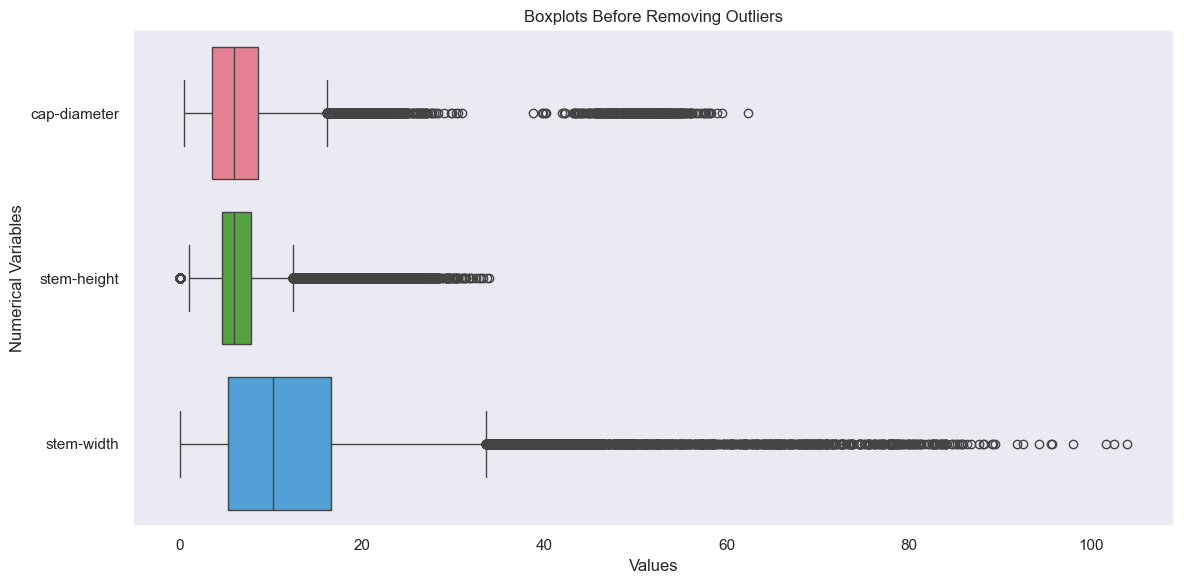

In [57]:
plot_boxplots(df_withouliers,'Boxplots Before Removing Outliers')

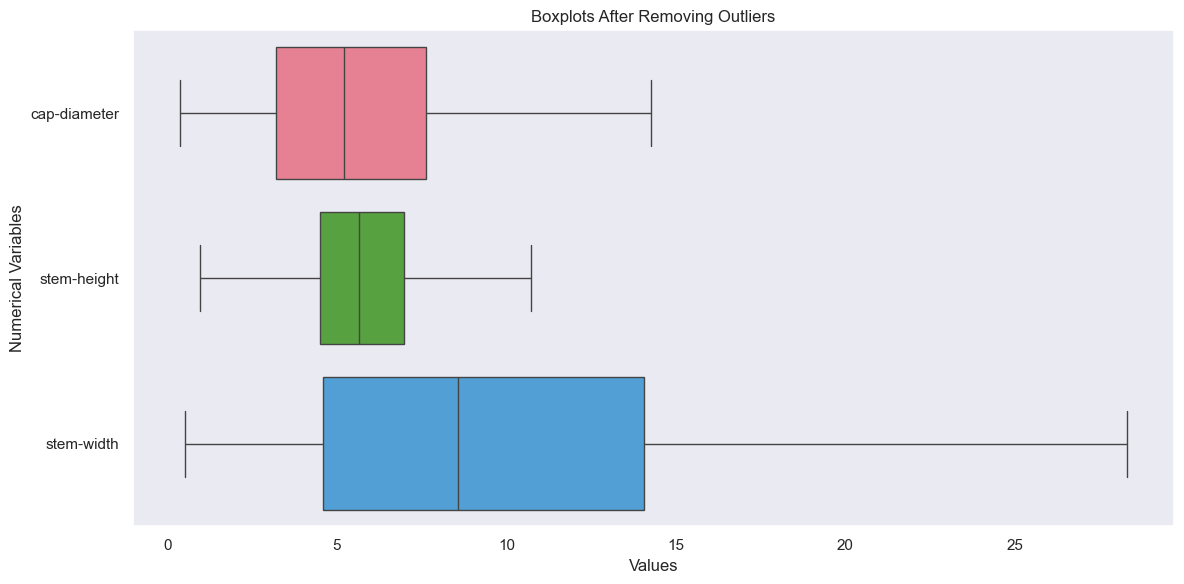

In [58]:
plot_boxplots(df,'Boxplots After Removing Outliers')

### **Plots For Visualization**

#### **HISTOGRAMS**

histograms for numerical variables; to better represent the distributions

 


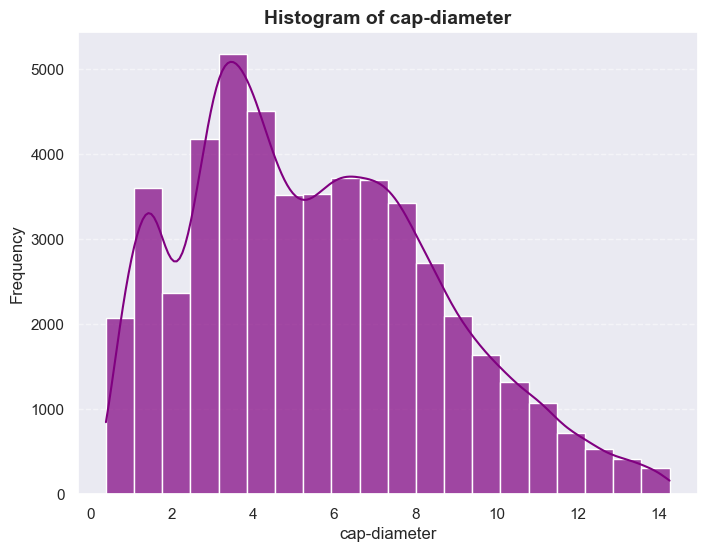

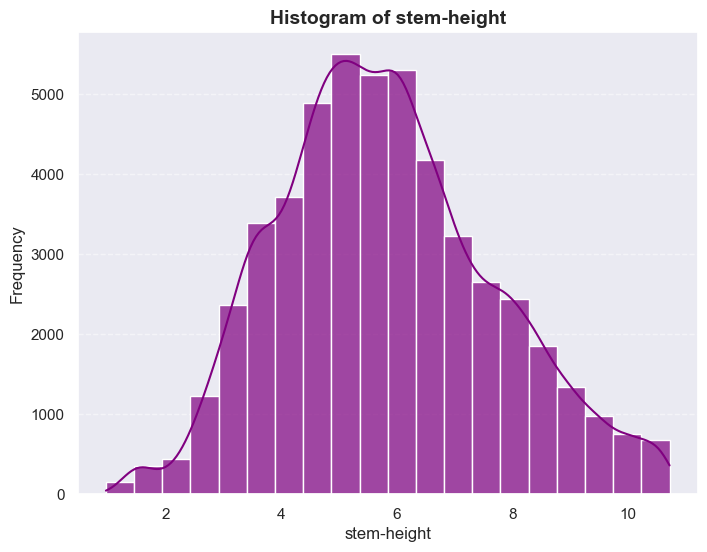

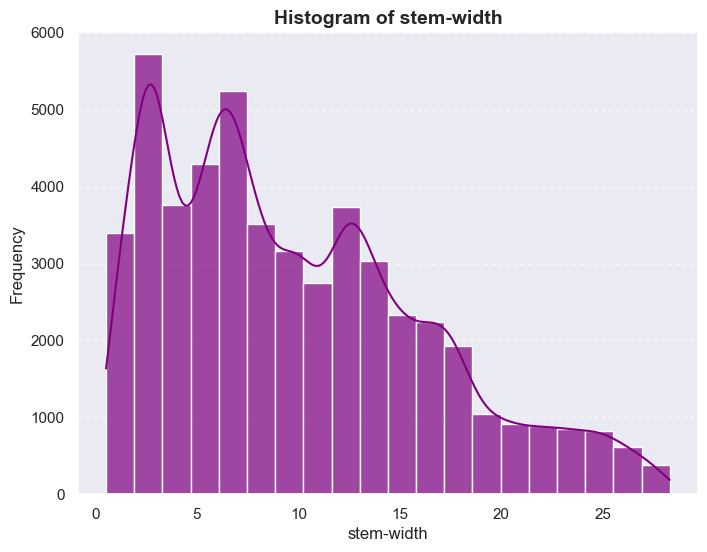

In [90]:
print("histograms for numerical variables; to better represent the distributions\n\n ")
numerical_variables = ['cap-diameter', 'stem-height', 'stem-width']
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, bins=20, kde=True, alpha=0.7)
    plt.title(f'Histogram of {var}', fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

#### **BARCHARTS**

 bar plots to visualise the categorical variables 




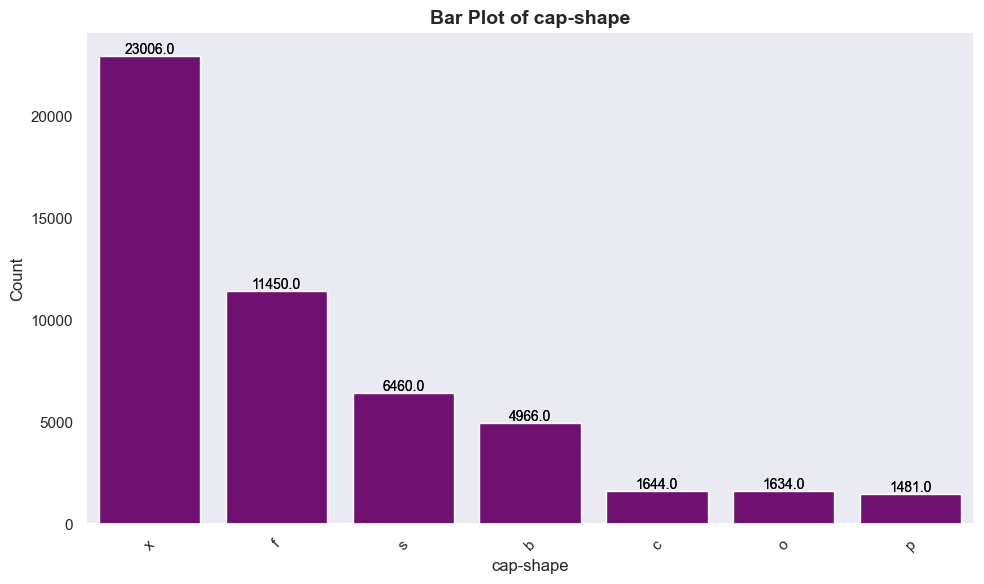

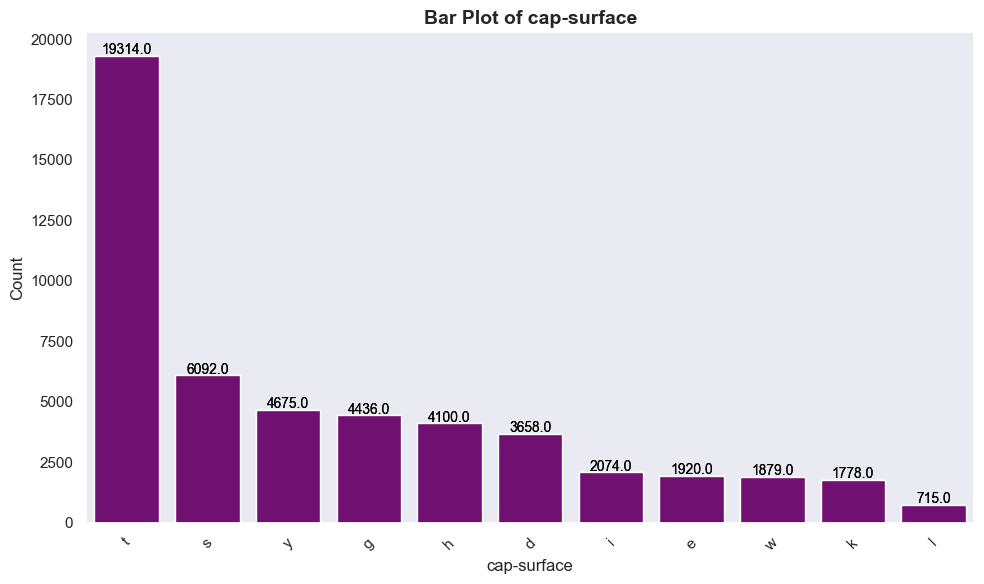

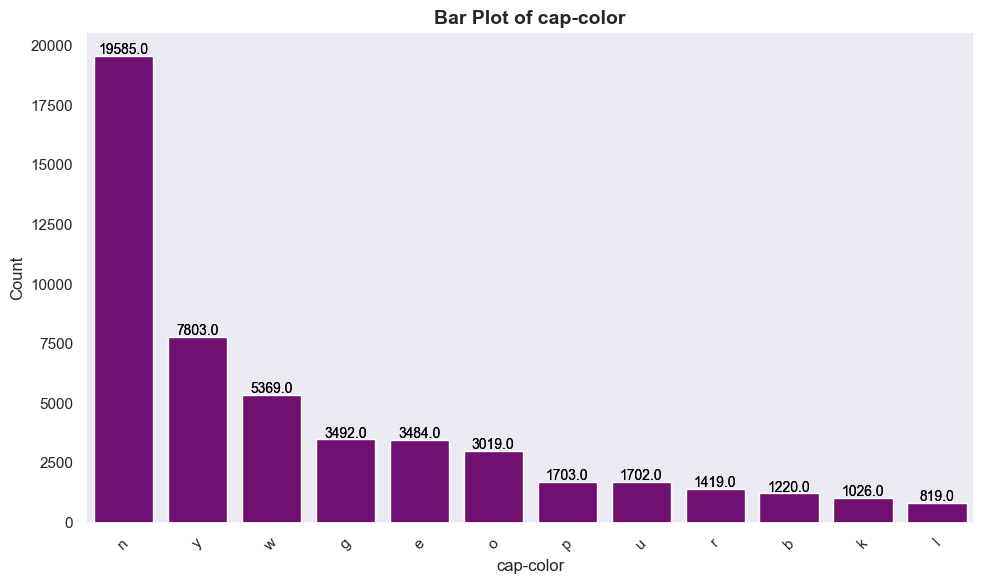

In [91]:
print(" bar plots to visualise the categorical variables \n\n")
categorical_variables = ['cap-shape', 'cap-surface', 'cap-color']
for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=var, order=df[var].value_counts().index, color='darkblue')
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Bar Plot of {var}', fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                    textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

#### **CORRELATION GRAPH**

 correlation matrix for numerical features 




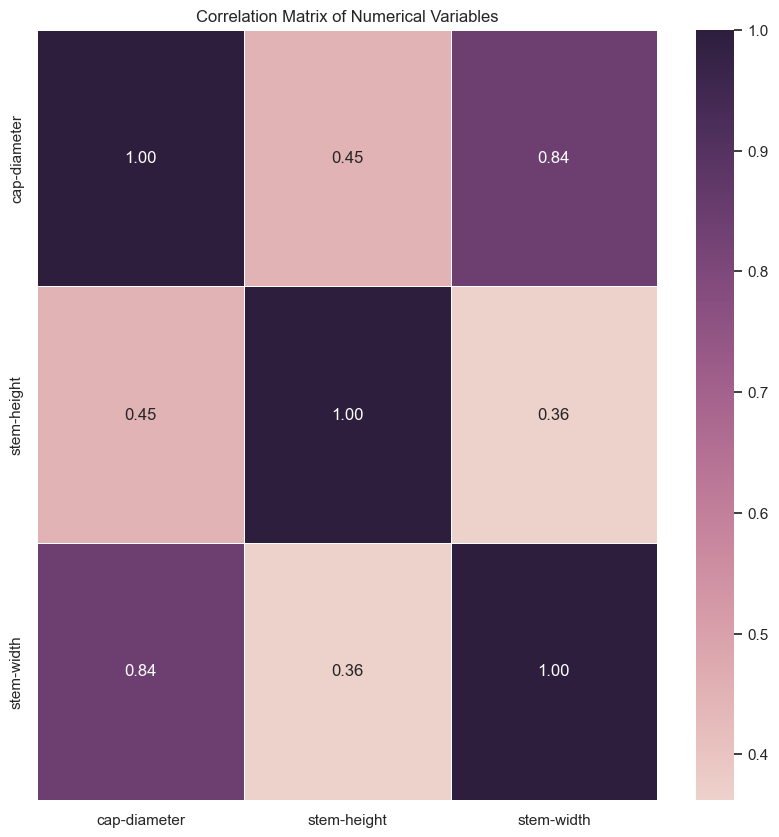

In [92]:
print(" correlation matrix for numerical features \n\n")
numerical_corr = df[numerical_variables].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#### **SCATTER PLOT**

In [134]:
fig = px.scatter_matrix(df[numerical_variables], title='Pairplot of Numerical Variables',
                         color_continuous_scale=['gray', 'gray'])

fig.update_layout(title={'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'},
                  height=800, width=800)
fig.show()


#### **PIE CHARTS**

In [135]:
import plotly.express as px

binary_variables = ['does-bruise-or-bleed', 'has-ring']

for var in binary_variables:
    #  value counts for the binary variable
    var_counts = df[var].value_counts()

    fig = px.pie(names=var_counts.index, values=var_counts.values,
                title=f'Pie Chart of {var} Classes: {", ".join(var_counts.index)}', hole=0.3)
    
    fig.update_traces(marker=dict(colors=['gray', 'purple']))
    fig.update_layout(title=f"Pie Chart of {var}",
                  showlegend=True,
                  height=400,  
                  width=800)   

    fig.show()




### **Class Imbalance**

**VISUALISING IMBALANCE**

In [258]:
# Count the occurrences of each target class
target_counts = df["target"].value_counts()

# Bar graph to visualize the class proportions in order to decide whether we are dealing with imbalance among them

fig = px.bar(x=target_counts.index, y=target_counts.values, labels={"x": "Target Class", "y": "Count"}, color=target_counts.index, color_discrete_map={'e': 'gray', 'p': 'purple'})

fig.update_layout(title="Distribution of Target Classes: Poisonous (p)   Edible (e)")

fig.update_layout(
                showlegend=True,
                height=400,  
                width=800)   
fig.show()

In [259]:

var = 'target'
target_counts = df[var].value_counts()

fig = px.pie(names=target_counts.index, values=target_counts.values,
             title=f'Pie Chart of {var} Classes: {", ".join(target_counts.index)}', hole=0.3)

fig.update_traces(marker=dict(colors=['gray', 'purple']))
fig.update_layout(title="Pie Charts of Binary Variables",
                  showlegend=True,
                  height=400,  
                  width=800)  

fig.show()


In [123]:
print("In the target variable, the classes are closely divided, however, the slight imbalance is to be handled for better computation")

In the target variable, the classes are closely divided, however, the slight imbalance is to be handled for better computation


 **OVERSAMPLING**

In [125]:
#delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling
#because we want as much data as possible we will do oversampling

X = df.drop(columns=['target']) 
y = df['target']  


oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='target')], axis=1)

#copy back to df for easier manipulation 
df= df_resampled


In [140]:


var = 'target'
target_counts = df[var].value_counts()

fig = px.pie(names=target_counts.index, values=target_counts.values,
             title=f'Pie Chart of {var}', hole=0.3,
             color_discrete_sequence=['purple', 'gray'])

fig.update_layout(
                  showlegend=True,
                  height=400,  
                  width=800)  

fig.show()


### **Data Encoding**

In [141]:
df=df_resampled

In [142]:
categorical_cols = df.drop(columns=['target']).select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64']).columns

In [21]:
categorical_cols

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')

In [22]:
numerical_cols

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

In [143]:
df.to_csv('D:\DM-6A/output.csv', index=False)  

##### **Analysis Of Encoding**

**Categorical Data Is Encoded Using**
<ol>
<li>BINARY</li>
<li>HASHING</li>
<li>ONE HOT</li>
</ol>

In [146]:


# encode the categorical features using Binary encoding
encoder = ce.BinaryEncoder(cols=categorical_cols)
encoded_categorical_cols = encoder.fit_transform(df[categorical_cols])

# scale the numerical features 
scaler = MinMaxScaler()
scaled_numerical_cols = scaler.fit_transform(df[numerical_cols])

X_encoded = np.hstack((scaled_numerical_cols, encoded_categorical_cols))

bin_df = pd.DataFrame(data=X_encoded, columns=np.concatenate((numerical_cols, encoder.get_feature_names_out())))
bin_df['target'] = df['target']
print(bin_df.shape)


(55212, 55)


In [147]:

# hash encoding on the categorical columns 
encoder = ce.HashingEncoder(cols=categorical_cols)
encoded_categorical_cols = encoder.fit_transform(df[categorical_cols])

# Scale numerical columns
scaler = MinMaxScaler()
scaled_numerical_cols = scaler.fit_transform(df[numerical_cols])

X_encoded = np.hstack((scaled_numerical_cols, encoded_categorical_cols))

# Since HashingEncoder doesn't provide column names, we'll use generic names for columns
encoded_columns = [f'hash_{i}' for i in range(encoded_categorical_cols.shape[1])]
hash_df = pd.DataFrame(data=X_encoded, columns=np.concatenate((numerical_cols, encoded_columns)))
hash_df['target'] = df['target']
print(hash_df.shape)


(55212, 12)


In [149]:

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categorical_cols = encoder.fit_transform(df[categorical_cols])

# Scale numerical columns
scaler = MinMaxScaler()
scaled_numerical_cols = scaler.fit_transform(df[numerical_cols])

X_encoded = np.hstack((scaled_numerical_cols, encoded_categorical_cols.toarray()))


one_df = pd.DataFrame(data=X_encoded, columns=np.concatenate((numerical_cols, encoder.get_feature_names_out(categorical_cols))))
one_df['target'] = df['target']
print(one_df.shape)


(55212, 116)


In [150]:
import warnings
warnings.filterwarnings("ignore", message="DataFrameGroupBy.apply operated on the grouping columns", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="Variables are collinear", category=UserWarning)

In [151]:
# sample the DataFrame while maintaining the same class distribution

binn = bin_df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))
hashh = hash_df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))
onee = one_df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

In [152]:
X_bin = binn.drop(columns=['target'])
y_bin = binn['target']

X_hash = hashh.drop(columns=['target'])
y_hash = hashh['target']

X_one = onee.drop(columns=['target'])
y_one = onee['target']

In [170]:

def encoding_best_params(X,y):

    log_reg_param_grid = {'C': [0.001, 0.01, 0.1, 0.05] , 'max_iter': [300, 400, 500, 600], 'penalty': [ 'l1','l2'] , 'solver': ['saga']}
    log_reg_model = LogisticRegression()

    log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_param_grid, cv=3, scoring='accuracy')
    log_reg_grid_search.fit(X, y)

    print("Accuracy: ", log_reg_grid_search.best_score_)
    print("Best paramaters: ", log_reg_grid_search.best_params_)

    
    return log_reg_grid_search.best_score_

In [171]:
print("Binary Encoding: ")
BinaryAccParams=encoding_best_params(X_bin,y_bin)

Binary Encoding: 
Accuracy:  0.7810594431192878
Best paramaters:  {'C': 0.1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}


In [172]:
print("Hashing Encoding: ")

HashAccParams=encoding_best_params(X_hash,y_hash)

Hashing Encoding: 
Accuracy:  0.6513929890025113
Best paramaters:  {'C': 0.1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}


In [173]:
print("One-Hot Encoding: ")


OHAccParams=encoding_best_params(X_one,y_one)

One-Hot Encoding: 
Accuracy:  0.8408190255768367
Best paramaters:  {'C': 0.1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}


In [176]:
fig = go.Figure(data=[go.Bar(x=['Binary', 'Hashing', 'One-Hot'], 
                             y=[BinaryAccParams, HashAccParams, OHAccParams], 
                             marker_color=['darkblue', 'gray', 'purple'])])
fig.update_layout(title='Accuracy Comparison of Different Encodings', xaxis_title='Encoding', yaxis_title='Accuracy')
fig.update_layout(title='Accuracy Comparison of Different Encodings', 
                  xaxis_title='Encoding', 
                  yaxis_title='Accuracy',
                  height=400,  
                  width=600)   
fig.show()

Since One-Hot performs the best when evaluated on the accuracy, we will choose to work on it 

### **Feature Extraction**

In [178]:
one_df.to_csv('D:\DM-6A\one.csv', index=False)  # save the one-hot encoded df locally to work from now on 

In [5]:
one_df=pd.read_csv('one.csv')

In [7]:
X = one_df.drop(columns=['target'])
y = one_df['target']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (55208, 115)
Shape of y: (55208,)


##### **FILTER METHOD**

**FINDING BEST K**

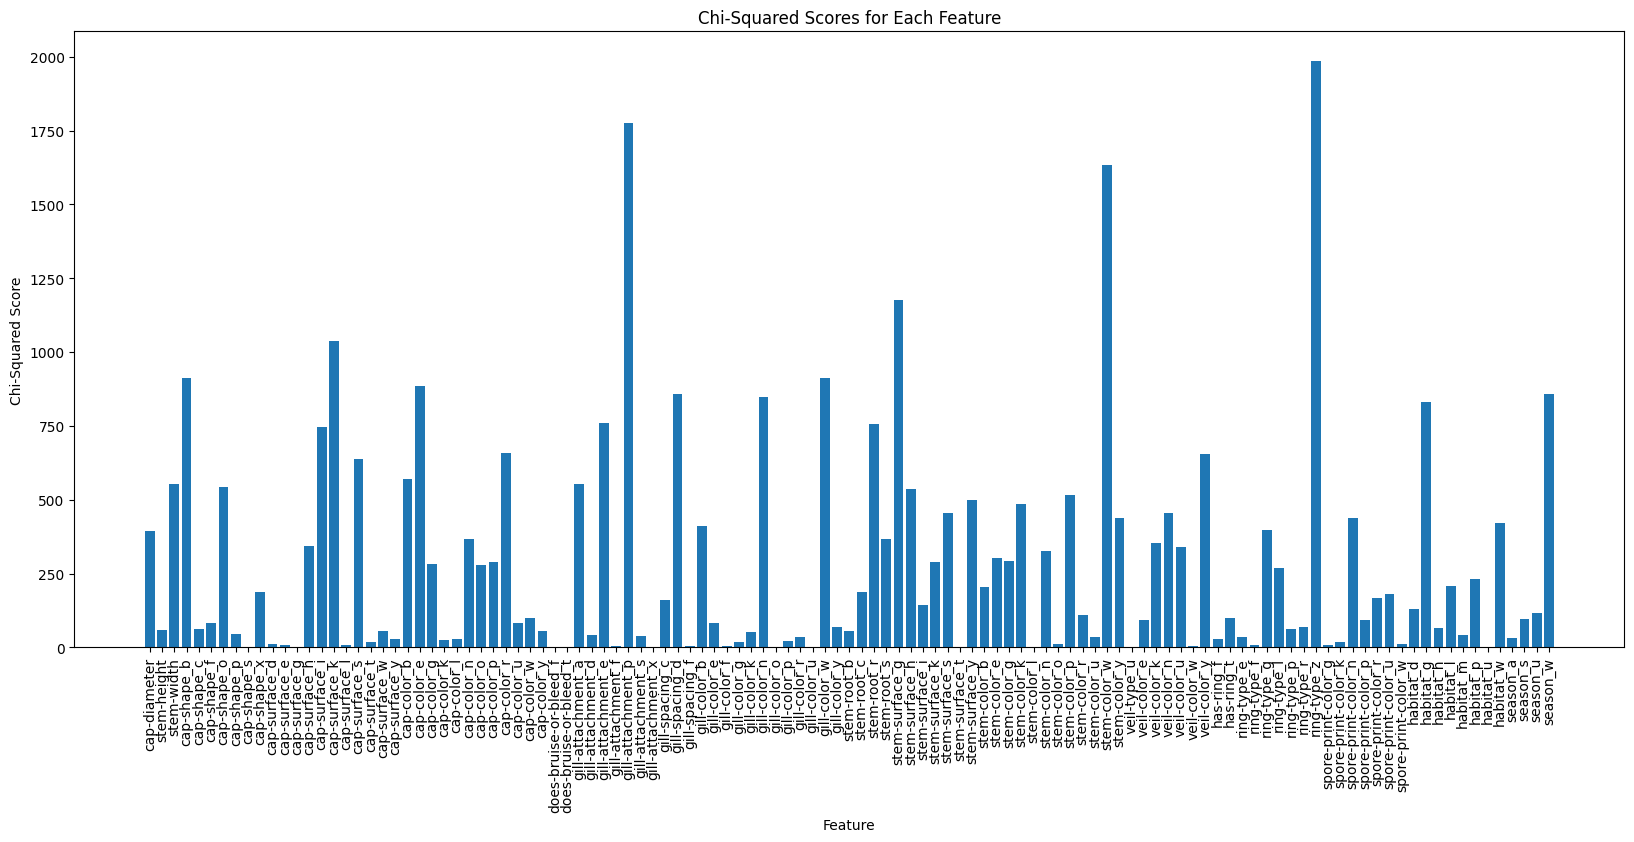

In [12]:
selector = SelectKBest(score_func=chi2, k='all')
X_selected = selector.fit_transform(X, y)

#  individual chi-squared scores to find out which and how many features are the most correlated
plt.figure(figsize=(20, 8))
plt.bar(range(len(X.columns)), selector.scores_, tick_label=X.columns)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Chi-Squared Score')
plt.title('Chi-Squared Scores for Each Feature')
plt.show()


In [22]:
# Create pipeline
pipeline = Pipeline([
    ('selector', SelectKBest(score_func=chi2)),
    ('classifier', LogisticRegression())
])

parameters = {
    'selector__k': [30, 45, 50, 75],  # Number of features to select
    'classifier__C': [0.01], 
    'classifier__penalty': ['l2']  
}


grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X, y)

# Print best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'selector__k': 75}
Best Score:  0.6023959682244119


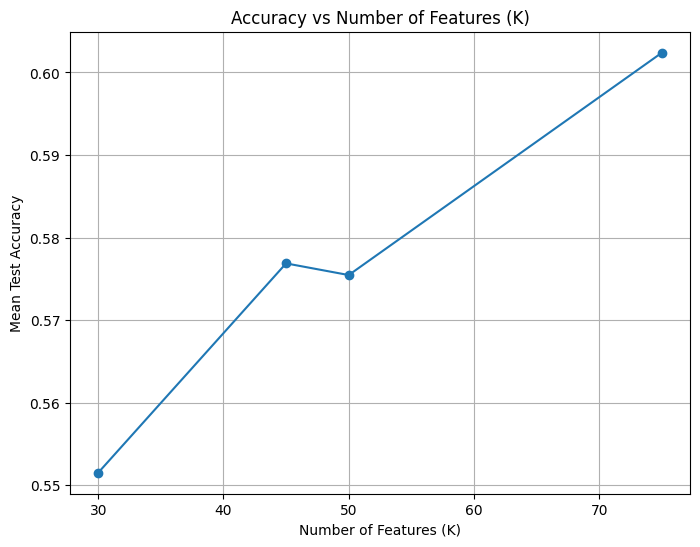

In [28]:

k_values = [30, 45, 50, 75]
scores = grid_search.cv_results_['mean_test_score']

# Plot graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, scores, marker='o')
plt.title('Accuracy vs Number of Features (K)')
plt.xlabel('Number of Features (K)')
plt.ylabel('Mean Test Accuracy')
plt.grid(True)
plt.show()

In [8]:
k = 75  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_indices]


print("Length Of Selected Features:")
print(len(selected_feature_names))


Length Of Selected Features:
75


##### **WRAPPER METHOD**

In [ ]:
# Define estimator 
estimator = LogisticRegression(max_iter=300,n_jobs=-1,solver='saga')  #

# Define pipeline with RFE
rfe = RFE(estimator)
pipeline = Pipeline(steps=[('rfe', rfe)])


param_grid = {
    'rfe__n_features_to_select': range(1,21)  #THIS IS THE NUMBERS OUR GRID SEARCH WILL CHECK
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3)  # 3-fold cross-validation, adjust cv as needed
grid_search.fit(X, y)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [ ]:
estimator = LogisticRegression(max_iter=300,n_jobs=-1,solver='saga')
selector = RFE(estimator, n_features_to_select=14)  # Choose the number of features you want to select
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]

X_selected = X[selected_features]

print("Selected Features:")
print(X_selected.head())


### **Grid Search For Best Hyperparamters**

##### **MODELS USEDS**
<ol>
<li>Logistic Regression</li>
<li>Decision Trees</li>
<li>Random Forest</li>
<li>Gradient Boosting Machines (GBM)</li>
<li>Support Vector Machines (SVM)</li>
<li>K-Nearest Neighbors (KNN)</li>
<li>Naive Bayes</li>
<li>Linear Discriminant Analysis (LDA)</li>
<li>Quadratic Discriminant Analysis</li>
</ol>

In [10]:
df_selected = X[selected_feature_names]
df_selected['target'] = y

C:\Users\arhar\AppData\Local\Temp\ipykernel_23704\1775539610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['target'] = y


In [37]:
# sample the DataFrame while maintaining the same class distribution
df_sampled = df_selected.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))
df_sampled.shape

C:\Users\arhar\AppData\Local\Temp\ipykernel_14276\3806355933.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



(2760, 76)

In [40]:
X=df_sampled.drop(columns='target')
X.shape

(2760, 75)

In [41]:
y=df_sampled['target']
y.shape

(2760,)

**LOGISTIC REGRESSION**

In [42]:
# Logistic Regression
log_reg_param_grid = {'C': [0.001, 0.01, 0.1, 0.05] , 'max_iter': [100, 200, 300, 400, 500], 'penalty': [ 'l1','l2'] , 'solver': ['saga']}
log_reg_model = LogisticRegression()

log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_param_grid, cv=3, scoring='accuracy')
log_reg_grid_search.fit(X, y)
log_reg_grid_search.best_score_


0.8076086956521739

In [43]:
log_reg_grid_search.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

**DECISION TREE**

In [44]:

dt_param_grid = {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion':['gini','entropy','log_loss']}
dt_model = DecisionTreeClassifier()

dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid_search.fit(X, y)
dt_grid_search.best_score_

0.9510869565217391

In [51]:
dt_grid_search.best_params_

{'criterion': 'log_loss',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

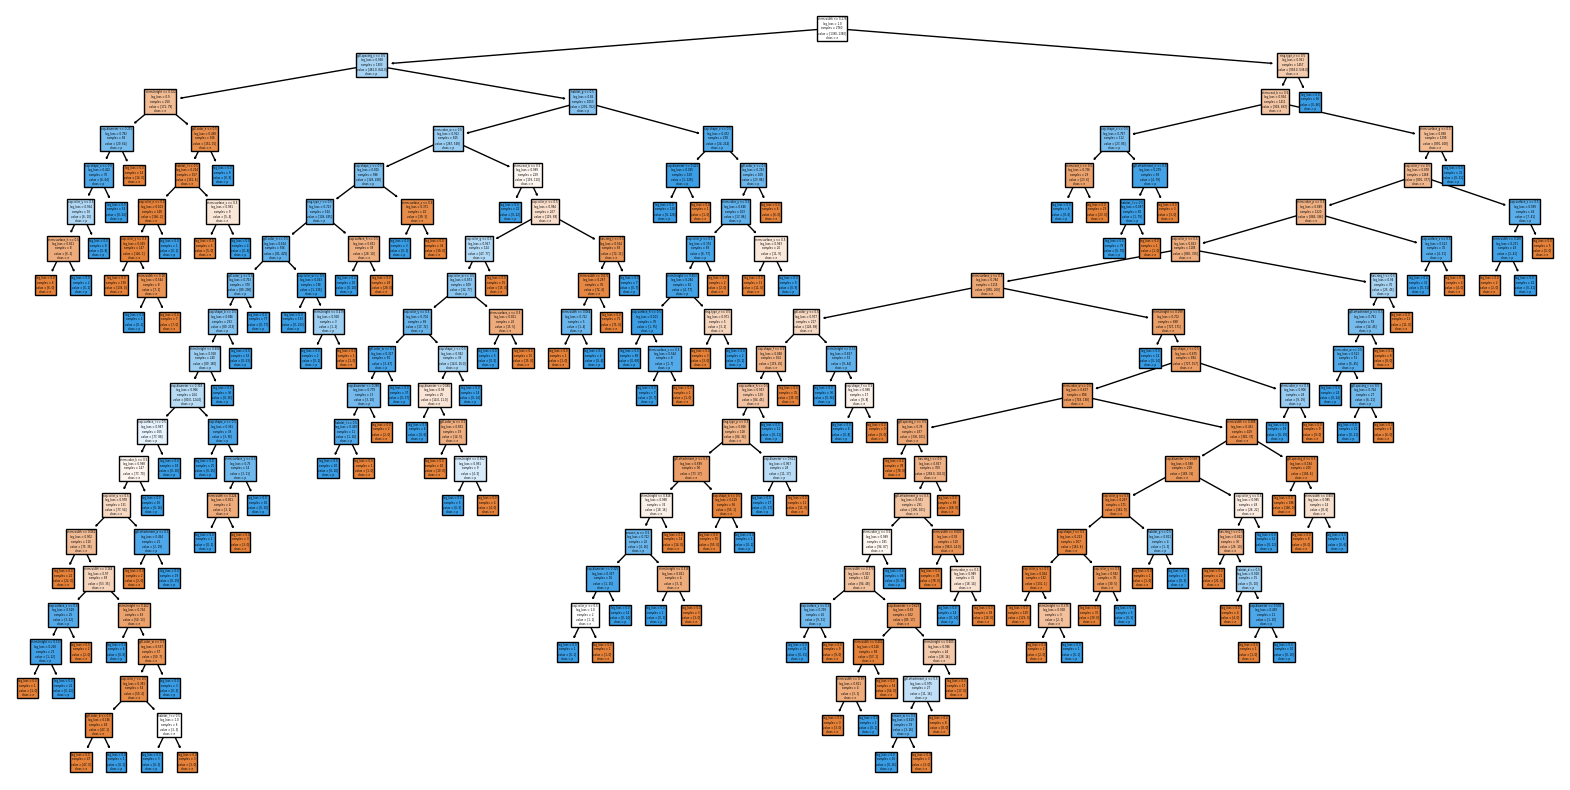

In [57]:
best_dt_model = dt_grid_search.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=['e','p'])
plt.show()


**RANDOM FOREST**

In [46]:
# random forest 
rf_param_grid = {'n_estimators': [100, 300, 500],
                 'max_depth': [None, 10, 20, 30, 40],
                
                 'min_samples_leaf': [1, 2, 4]}
rf_model = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X, y)
rf_grid_search.best_score_


0.9891304347826088

In [47]:
rf_grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300}

In [48]:
results_df = pd.DataFrame(rf_grid_search.cv_results_)

fig = px.bar(
    results_df, 
    x='param_n_estimators', 
    y='mean_test_score', 
    color='param_max_depth',
    facet_col='param_min_samples_leaf',
    labels={'mean_test_score': 'Mean Test Accuracy', 'param_n_estimators': 'Number of Estimators'},
    title='Random Forest Hyperparameter Tuning Results',
     color_discrete_map={
        10: 'purple',
        20: 'darkblue',
        30: 'black',
        40:'gray'
    },
    
    height=400,
    width=900
)
fig.show()

**Gradient Boosting**

In [58]:

gbm_param_grid = {'n_estimators': [100, 300, 500],
                  'learning_rate': [0.01, 0.1, 0.5],
                  'max_depth': [3, 5, 7]}
gbm_model = GradientBoostingClassifier()

gbm_grid_search = GridSearchCV(gbm_model, gbm_param_grid, cv=3, scoring='accuracy')
gbm_grid_search.fit(X, y)
gbm_grid_search.best_score_


0.9894927536231884

In [59]:
gbm_grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

In [60]:
results_df = pd.DataFrame(gbm_grid_search.cv_results_)

fig = px.bar(
    results_df, 
    x='param_n_estimators', 
    y='mean_test_score', 
    color='param_learning_rate',
    facet_col='param_max_depth',
    labels={'mean_test_score': 'Mean Test Accuracy', 'param_n_estimators': 'Number of Estimators'},
    title='Gradient Boosting Machines (GBM) Hyperparameter Tuning Results',
     color_discrete_map={
        0.01: 'purple',
        0.1: 'darkblue',
        0.5:'gray'
    },
    height=400,
    width=900
)
fig.show()

**Support Vector Machines**

In [68]:
# Support Vector Machines (SVM)
svm_param_grid = {'C': [0.1, 1, 10],
                  'gamma': ['scale', 'auto'],
                  'kernel': ['linear', 'rbf', 'poly']}
svm_model = SVC()

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X, y)
svm_grid_search.best_score_

0.9757246376811595

In [62]:
svm_grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [64]:

results_df = pd.DataFrame(svm_grid_search.cv_results_)

fig = px.bar(
    results_df, 
    x='param_C', 
    y='mean_test_score', 
    color='param_kernel',
    facet_col='param_gamma',
    labels={'mean_test_score': 'Mean Test Accuracy', 'param_C': 'C'},
    title='Support Vector Machines (SVM) Hyperparameter Tuning Results',
    color_discrete_map={
        'linear': 'gray',
        'rbf': 'purple',
        'poly': 'darkblue'
    },
    height=400,  
    width=900   
)
fig.show()


**KNN**

In [69]:
# K-Nearest Neighbors (KNN)
knn_param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid_search.fit(X, y)
knn_grid_search.best_score_

0.9713768115942029

In [66]:
knn_grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [67]:
KNNresults_df = pd.DataFrame(knn_grid_search.cv_results_)

fig = px.bar(
    KNNresults_df, 
    x='param_n_neighbors', 
    y='mean_test_score', 
    color='param_weights',
    facet_col='param_algorithm',
    labels={'mean_test_score': 'Mean Test Accuracy', 'param_n_neighbors': 'Number of Neighbors'},
    title='K-Nearest Neighbors (KNN) Hyperparameter Tuning Results',
    color_discrete_map={
        'uniform': 'darkblue',
        'distance': 'purple'
    },
    height=400,  
    width=1200 ,
    
)
fig.show()

**Naive Bayes**

In [294]:

nb_model = GaussianNB()
nb_model.fit(X, y)

NBresults = {'params': ['default'], 'mean_test_score': [nb_model.score(X, y)]}

NBDF = pd.DataFrame(NBresults)

fig = px.bar(
    NBDF, 
    x='params', 
    y='mean_test_score', 
    labels={'mean_test_score': 'Mean Test Accuracy'},
    title='Naive Bayes Model Performance',
    color_discrete_map={'default': 'gray'},
    height=400,  
    width=400  ,
    text='mean_test_score',
)
fig.show()

**Quadratic Discriminant Analysis**

In [293]:

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X,y)
QDA_results = {'params': ['default'], 'mean_test_score': [qda_model.score(X, y)]}
QDdf = pd.DataFrame(QDA_results)

fig = px.bar(
    QDdf, 
    x='params', 
    y='mean_test_score', 
    labels={'mean_test_score': 'Mean Test Accuracy'},
    title='Quadratic Discriminant Analysis Model Performance',
    color_discrete_map={'default': 'purple'},
    height=400,  
    width=400,
    text='mean_test_score',  
)
fig.show()

### **Classifier Evaluation and Comparison**

In [20]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names, but LogisticRegression was fitted with feature names")
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names")
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names, but RandomForestClassifier was fitted with feature names")
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names")

In [12]:

# general function for classifiers
def evaluateClassifier(clf, x, y):
    
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
    
    clf.fit(xtrain, ytrain)
    
    predicted = clf.predict(xtest)
    
    # compute metrics
    accuracy = accuracy_score(ytest, predicted)
    precision = precision_score(ytest, predicted, pos_label='e')
    recall = recall_score(ytest, predicted, pos_label='e')
    f1 = f1_score(ytest, predicted, pos_label='e')
    sensitivity = recall_score(ytest, predicted, pos_label='e')
    specificity = recall_score(ytest, predicted, pos_label='e')
    
    # dataframe that stores the evaluation metrics 
    EvaluationDF = pd.DataFrame({
        'Classifier': [type(clf).__name__],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
        'F1 Score': [f1]
    })
    
    return EvaluationDF


In [11]:
x = df_selected.drop(columns=['target'])
y = df_selected['target']
x.shape

(55208, 75)

In [13]:
def sample_prediction(clf):
    prediction = clf.predict([x.iloc[0]])
    print("Prediction:", prediction)
    print('Actual:',y[0])


In [7]:
# x=pd.read_csv('xBeforeXAI')
# y=pd.read_csv('yBeforeXAI')
# y=y['target']
# reloading the dataset 

In [14]:
LGclf = LogisticRegression(C=0.1,max_iter=300,penalty='l2',solver='saga')
LGmetrics=evaluateClassifier(LGclf,x,y)
LGmetrics

Classifier  Accuracy  Precision    Recall  Sensitivity  \
0  LogisticRegression  0.854827   0.842032  0.874435     0.874435   

   Specificity  F1 Score  
0     0.874435  0.857928

In [15]:
DTclf = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=10)
DTmetrics=evaluateClassifier(DTclf,x,y)
DTmetrics

Classifier  Accuracy  Precision    Recall  Sensitivity  \
0  DecisionTreeClassifier   0.91958   0.875061  0.979404     0.979404   

   Specificity  F1 Score  
0     0.979404  0.924297

In [16]:
RFclf = RandomForestClassifier(max_depth=10,min_samples_leaf=1,n_estimators=100)
RFmetrics=evaluateClassifier(RFclf,x,y)
RFmetrics

Classifier  Accuracy  Precision    Recall  Sensitivity  \
0  RandomForestClassifier  0.951096   0.935484  0.969286     0.969286   

   Specificity  F1 Score  
0     0.969286  0.952085

In [17]:
GBMclf = GradientBoostingClassifier(learning_rate=0.01,max_depth=7,n_estimators=100)
GBMmetrics=evaluateClassifier(GBMclf,x,y)
GBMmetrics

Classifier  Accuracy  Precision    Recall  Sensitivity  \
0  GradientBoostingClassifier  0.944304   0.932489  0.958266     0.958266   

   Specificity  F1 Score  
0     0.958266  0.945202

In [84]:
SVMclf = SVC(C=10,gamma='scale',kernel='poly', probability=True)
SVMmetrics=evaluateClassifier(SVMclf,x,y)
SVMmetrics

Classifier  Accuracy  Precision    Recall  Sensitivity  Specificity  \
0        SVC  0.997464   0.999275  0.995664     0.995664     0.995664   

   F1 Score  
0  0.997466

In [85]:
KNNclf = KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
KNNmetrics=evaluateClassifier(KNNclf,x,y)
KNNmetrics

Classifier  Accuracy  Precision    Recall  Sensitivity  \
0  KNeighborsClassifier  0.999004   0.998196  0.999819     0.999819   

   Specificity  F1 Score  
0     0.999819  0.999007

In [86]:
NBclf = GaussianNB()
NBmetrics=evaluateClassifier(NBclf,x,y)
NBmetrics

Classifier  Accuracy  Precision    Recall  Sensitivity  Specificity  \
0  GaussianNB   0.61411   0.565253  0.996929     0.996929     0.996929   

   F1 Score  
0  0.721449

In [87]:
LDAclf = LinearDiscriminantAnalysis()
LDAmetrics=evaluateClassifier(LDAclf,x,y)
LDAmetrics

Classifier  Accuracy  Precision    Recall  Sensitivity  \
0  LinearDiscriminantAnalysis  0.850661   0.831796  0.880036     0.880036   

   Specificity  F1 Score  
0     0.880036  0.855237

In [88]:
QDAclf = QuadraticDiscriminantAnalysis()
QDAmetrics=evaluateClassifier(QDAclf,x,y)
QDAmetrics

C:\Users\arhar\AppData\Roaming\Python\Python310\site-packages\sklearn\discriminant_analysis.py:935: UserWarning:

Variables are collinear



Classifier  Accuracy  Precision  Recall  Sensitivity  \
0  QuadraticDiscriminantAnalysis  0.613204    0.56445     1.0          1.0   

   Specificity  F1 Score  
0          1.0  0.721596

In [23]:
sample_prediction(LGclf)

Prediction: ['e']
Actual: p


In [24]:
sample_prediction(DTclf)

Prediction: ['e']
Actual: p


In [25]:
sample_prediction(RFclf)

Prediction: ['p']
Actual: p


In [26]:
sample_prediction(GBMclf)

Prediction: ['p']
Actual: p


****Comparison****


In [89]:
# plot to compare the classifiers and their performance 
data = {
    'Classifier': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Naive Bayes', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis'],
    'Accuracy': [LGmetrics['Accuracy'][0], DTmetrics['Accuracy'][0], RFmetrics['Accuracy'][0], GBMmetrics['Accuracy'][0], SVMmetrics['Accuracy'][0], KNNmetrics['Accuracy'][0], NBmetrics['Accuracy'][0], LDAmetrics['Accuracy'][0], QDAmetrics['Accuracy'][0]],
    'Precision': [LGmetrics['Precision'][0], DTmetrics['Precision'][0], RFmetrics['Precision'][0], GBMmetrics['Precision'][0], SVMmetrics['Precision'][0], KNNmetrics['Precision'][0], NBmetrics['Precision'][0], LDAmetrics['Precision'][0], QDAmetrics['Precision'][0]],
    'Recall': [LGmetrics['Recall'][0], DTmetrics['Recall'][0], RFmetrics['Recall'][0], GBMmetrics['Recall'][0], SVMmetrics['Recall'][0], KNNmetrics['Recall'][0], NBmetrics['Recall'][0], LDAmetrics['Recall'][0], QDAmetrics['Recall'][0]],
    'Sensitivity': [LGmetrics['Sensitivity'][0], DTmetrics['Sensitivity'][0], RFmetrics['Sensitivity'][0], GBMmetrics['Sensitivity'][0], SVMmetrics['Sensitivity'][0], KNNmetrics['Sensitivity'][0], NBmetrics['Sensitivity'][0], LDAmetrics['Sensitivity'][0], QDAmetrics['Sensitivity'][0]],
    'Specificity': [LGmetrics['Specificity'][0], DTmetrics['Specificity'][0], RFmetrics['Specificity'][0], GBMmetrics['Specificity'][0], SVMmetrics['Specificity'][0], KNNmetrics['Specificity'][0], NBmetrics['Specificity'][0], LDAmetrics['Specificity'][0], QDAmetrics['Specificity'][0]],
    'F1 Score': [LGmetrics['F1 Score'][0], DTmetrics['F1 Score'][0], RFmetrics['F1 Score'][0], GBMmetrics['F1 Score'][0], SVMmetrics['F1 Score'][0], KNNmetrics['F1 Score'][0], NBmetrics['F1 Score'][0], LDAmetrics['F1 Score'][0], QDAmetrics['F1 Score'][0]]
}

metricsALL = pd.DataFrame(data)
# melting the data to plot it easily
metrics_melted = metricsALL.melt(id_vars='Classifier', var_name='Metric', value_name='Score')

colors = {
    'Accuracy': 'purple',
    'Precision': 'gray',
    'Recall': 'darkblue',
    'Sensitivity': 'black',
    'Specificity': 'brown',
    'F1 Score': 'darkred'
}

fig = px.bar(
    metrics_melted, 
    x='Classifier', 
    y='Score', 
    color='Metric',
    color_discrete_map=colors,
    barmode='group',
    title='Classifier Evaluation Metrics Comparison',
    labels={'Score': 'Score Value'}
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})  # order classifiers by total score
fig.show()

### **Explainable AI**

##### **SHAP**

**using model agnostic methods because we have quite a variety of classifers**

In [90]:
shap.initjs()

In [ ]:
#reloading the dataset because new kernel. 
# x=pd.read_csv('xBeforeXAI')
# y=pd.read_csv("yBeforeXAI")
# x,y

In [91]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

**Random Forest**

Feature Importance - Random Forest


<Figure size 1200x600 with 0 Axes>

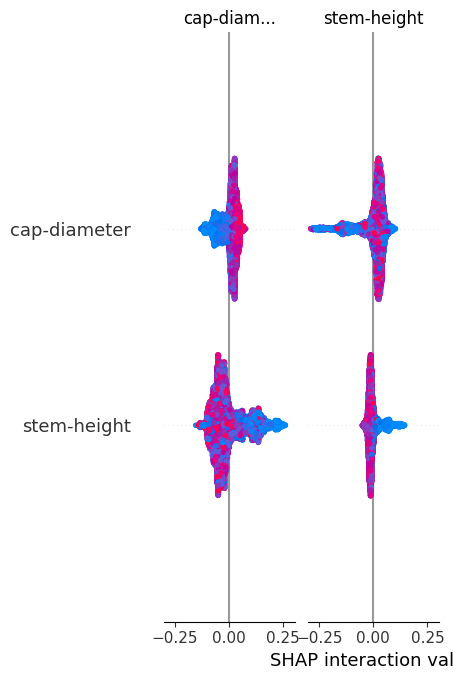

In [92]:
explainer=shap.TreeExplainer(RFclf)
shapValues=explainer.shap_values(xtest)
print("Feature Importance - Random Forest")
fig=plt.figure(figsize=(12,6))
shap.summary_plot(shapValues, xtest)

**Decision Tree**

Feature Importance - Decision Tree


<Figure size 1200x600 with 0 Axes>

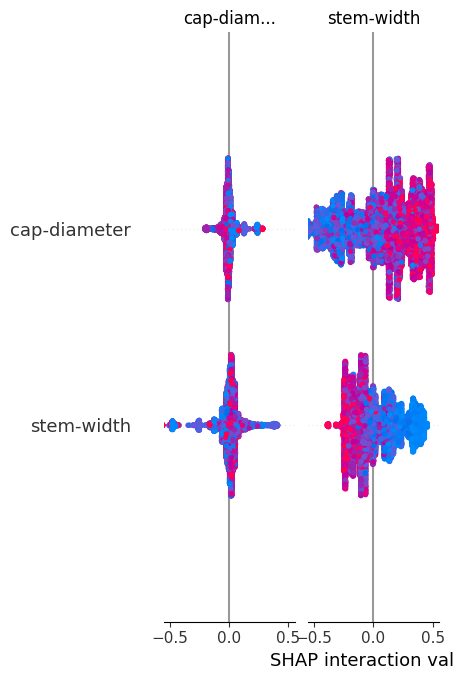

In [42]:
explainer=shap.TreeExplainer(DTclf)
shapValues=explainer.shap_values(xtest)
print("Feature Importance - Decision Tree")
fig=plt.figure(figsize=(12,6))
shap.summary_plot(shapValues, xtest)


In [93]:
feature_names = x.columns.tolist()


**Logistic Regression**

In [ ]:
explainer = shap.KernelExplainer(LGclf.predict_proba, shap.sample(xtrain, 10))
shapValues = explainer.shap_values(xtest)

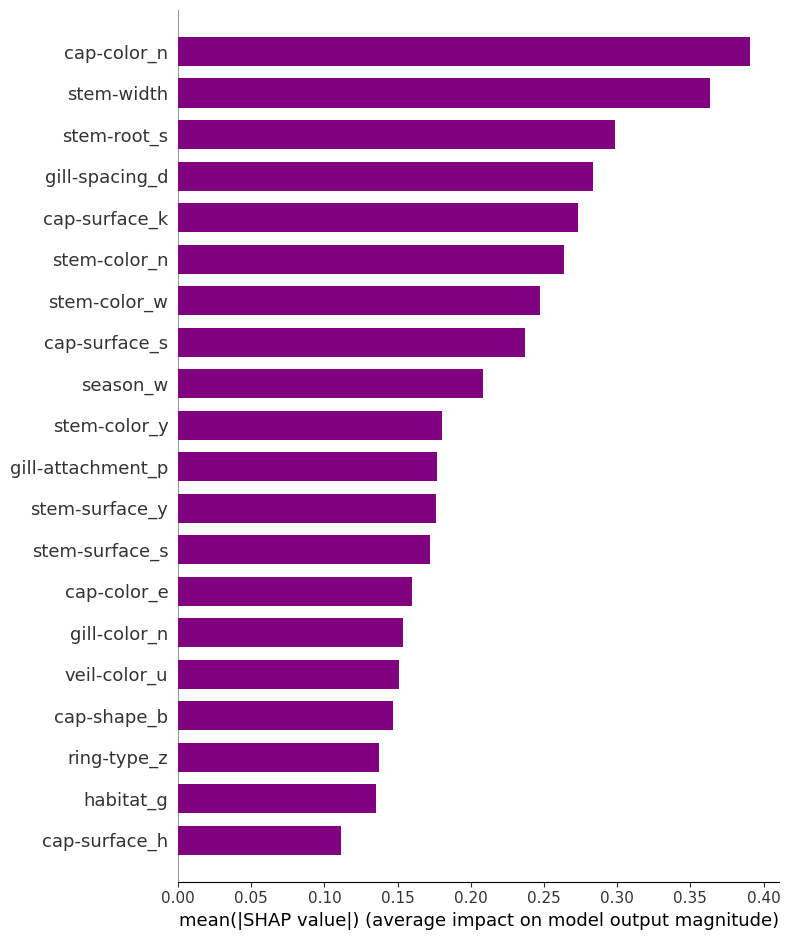

In [78]:
fig = plt.figure(figsize=(12, 6))
shap.summary_plot(shapValues, xtest, plot_type="bar", color='purple')
plt.show()

**Naive Bayes**

  0%|          | 0/11043 [00:00<?, ?it/s]

<Figure size 1200x600 with 0 Axes>

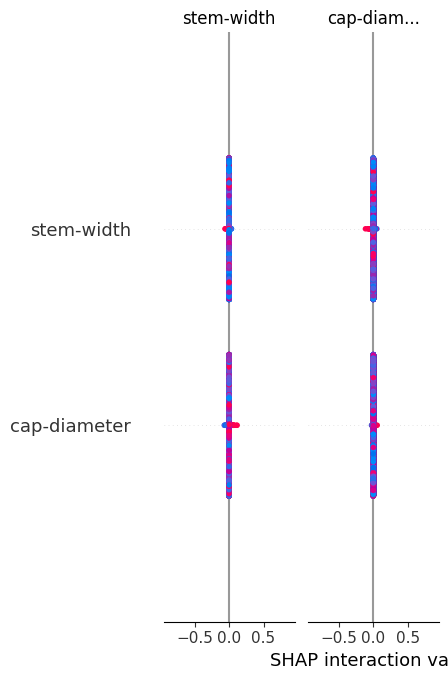

In [21]:
explainer = shap.KernelExplainer(NBclf.predict_proba, shap.sample(xtrain, 10))
shapValues = explainer.shap_values(xtest)
fig = plt.figure(figsize=(12, 6))
shap.summary_plot(shapValues, xtest, plot_type="bar", color='purple')
plt.show()

 shap is not able to efficiently identify rest of the classification models used for each feature's impact. 

**LIME**

In [48]:

class_names = ['p', 'e']
feature_names = list(xtrain.columns)
explainer = LimeTabularExplainer(xtrain.values, feature_names =feature_names,
                                 class_names = class_names, 
                                 mode = 'classification',discretize_continuous=False)

In [62]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], RFclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
fig.update_layout(title='Lime Plot',
                  height=600,
                  width=1200,
                  showlegend=False)

fig.show()



c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [64]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], LGclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
fig.update_layout(title='Lime Plot',
                  height=600,
                  width=1200,
                  showlegend=False)

fig.show()



c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [65]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], DTclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
fig.update_layout(title='Lime Plot',
                  height=600,
                  width=1200,
                  showlegend=False)

fig.show()



c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [66]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], SVMclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
fig.update_layout(title='Lime Plot',
                  height=600,
                  width=1200,
                  showlegend=False)

fig.show()



c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [67]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], LDAclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
fig.update_layout(title='Lime Plot',
                  height=600,
                  width=1200,
                  showlegend=False)

fig.show()



c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



In [68]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], QDAclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
fig.update_layout(title='Lime Plot',
                  height=600,
                  width=1200,
                  showlegend=False)

fig.show()



c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names



In [85]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], NBclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]
fig = make_subplots(rows=2, cols=1, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=2, col=1)
fig.update_layout(title='Lime Plot',
                  height=1200,
                  width=900,
                  showlegend=False)
fig.show()


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [70]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], KNNclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
fig.update_layout(title='Lime Plot',
                  height=600,
                  width=1200,
                  showlegend=False)

fig.show()



c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [69]:
instance_idx = 0
instance = xtrain.iloc[[instance_idx]]
exp = explainer.explain_instance(instance.values[0], GBMclf.predict_proba, num_features=len(xtrain.columns))
lime_plot = exp.as_list(label=1)
features = [x[0] for x in lime_plot]
values = [x[1] for x in lime_plot]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
fig.update_layout(title='Lime Plot',
                  height=600,
                  width=1200,
                  showlegend=False)

fig.show()



c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



##### **LIME**

**The function to create the LIME plots for a classifier**

In [20]:
def createLimePlot(explainer, clf, xtrain, instanceIdx):
    instance = xtrain.iloc[[instanceIdx]]
    exp = explainer.explain_instance(instance.values[0], clf.predict_proba, num_features=len(xtrain.columns))
    limePlot = exp.as_list(label=1)
    features = [x[0] for x in limePlot]
    values = [x[1] for x in limePlot]

    fig = make_subplots(rows=1, cols=2, subplot_titles=('Feature Importance', 'Feature Values'))
    fig.add_trace(go.Bar(x=values, y=features, orientation='h', marker_color='purple'), row=1, col=1)
    fig.add_trace(go.Bar(x=instance.columns, y=instance.values[0], marker_color='gray'), row=1, col=2)
    fig.update_layout(title='Lime Plot',
                      height=600,
                      width=1200,
                      showlegend=False)
    
    return fig

  ##########3


In [22]:

class_names = ['p', 'e']
feature_names = list(xtrain.columns)
explainer = LimeTabularExplainer(xtrain.values, feature_names=feature_names, class_names=class_names, mode='classification', discretize_continuous=False)


**running for each classifier**

In [ ]:
DTPlot=createLimePlot(explainer, DTclf, xtrain, 0)
RFPlot=createLimePlot(explainer, RFclf, xtrain, 0)
SVMPlot=createLimePlot(explainer, SVMclf, xtrain, 0)
LDAPlot = createLimePlot(explainer, LDAclf, xtrain, 0)
QDAPlot = createLimePlot(explainer, QDAclf, xtrain, 0)
NBPlot = createLimePlot(explainer, NBclf, xtrain, 0)
KNNPlot = createLimePlot(explainer, KNNclf, xtrain, 0)
GBMPlot = createLimePlot(explainer, GBMclf, xtrain, 0)


In [24]:
DTPlot.show()


In [25]:
RFPlot.show()


In [31]:
SVMPlot.show()


In [30]:
LDAPlot.show()


In [29]:
QDAPlot.show()


In [28]:
NBPlot.show()


In [27]:
KNNPlot.show()


In [26]:
GBMPlot.show()

### **Neural Networks**

**Encoding Target**

In [182]:
# Encode the categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Helping Functions**

In [ ]:
def evaluate_ann(model, X_test, y_test):
    # Make predictions
    y_pred_proba = model.predict(X_test)
    
    # Convert probabilities to binary predictions
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    # Create DataFrame to store evaluation metrics
    EvaluationDF = pd.DataFrame({
        'Classifier': [type(model).__name__],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
        'F1 Score': [f1]
    })
    
    return EvaluationDF


In [215]:
def create_model(neurons1=64, neurons2=32, optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    model.add(Dense(neurons2, activation='relu'))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

**Finding Best Parameters**

In [ ]:
# Define the grid search parameters
param_grid = {
    'neurons1': [32, 64, 128],
    'optimizer': ['adam', 'rmsprop']
}

best_score = 0
best_params = {}

# Loop through different combinations of neurons
for neurons1 in param_grid['neurons1']:
        for optimizer in param_grid['optimizer']:
            
            model = create_model(neurons1=neurons1, neurons2=neurons1//2, optimizer=optimizer)
            
     
            model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
            
         
            score = model.evaluate(X_train, y_train, verbose=0)[1]
            
            # Check if the current model is the best one
            if score > best_score:
                best_score = score
                best_params = {'neurons1': neurons1, 'neurons2': neurons1//2, 'optimizer': optimizer}

In [217]:
# Print the best parameters and score
print("Best score:", best_score)
print("Best parameters:", best_params)

Best score: 0.999366044998169
Best parameters: {'neurons1': 128, 'neurons2': 64, 'optimizer': 'adam'}


In [219]:
model=create_model(128,64,'adam')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [220]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1381/1381 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8864 - loss: 0.2620 - val_accuracy: 0.9954 - val_loss: 0.0169
Epoch 2/10
1381/1381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9943 - loss: 0.0182 - val_accuracy: 0.9941 - val_loss: 0.0142
Epoch 3/10
1381/1381 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9967 - val_loss: 0.0077
Epoch 4/10
1381/1381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9969 - loss: 0.0078 - val_accuracy: 0.9972 - val_loss: 0.0069
Epoch 5/10
1381/1381 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9972 - loss: 0.0071 - val_accuracy: 0.9971 - val_loss: 0.0080
Epoch 6/10
1381/1381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9968 - loss: 0.0079 - val_accuracy: 0.9986 - val_loss: 0.0038
Epoch 7/10
1381/1381 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9980 - loss: 0.0051 - val_accuracy: 0.9978 - val_loss: 0.0051
Epoch 8/10
1381/1381 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9976 - loss: 0.0057 - 

In [239]:
Ann_metrics=evaluate_ann(model,X_test,y_test)

346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [242]:
def plot_evaluation_metrics(df):
    fig = go.Figure()

    # Add bar plots for each evaluation metric
    fig.add_trace(go.Bar(x=df['Classifier'], y=df['Accuracy'], name='Accuracy'))
    fig.add_trace(go.Bar(x=df['Classifier'], y=df['Precision'], name='Precision'))
    fig.add_trace(go.Bar(x=df['Classifier'], y=df['Recall'], name='Recall'))
    fig.add_trace(go.Bar(x=df['Classifier'], y=df['Sensitivity'], name='Sensitivity'))
    fig.add_trace(go.Bar(x=df['Classifier'], y=df['Specificity'], name='Specificity'))
    fig.add_trace(go.Bar(x=df['Classifier'], y=df['F1 Score'], name='F1 Score'))

    # Update layout
    fig.update_layout(barmode='group', title='Evaluation Metrics',
                      xaxis_title='Classifier', yaxis_title='Metric Value')

    fig.show()




In [243]:
plot_evaluation_metrics(Ann_metrics)

In [222]:
model.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_160 (Dense)               │ (None, 128)            │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,149 (211.52 KB)

 Trainable params: 18,049 (70.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,100 (141.02 KB)

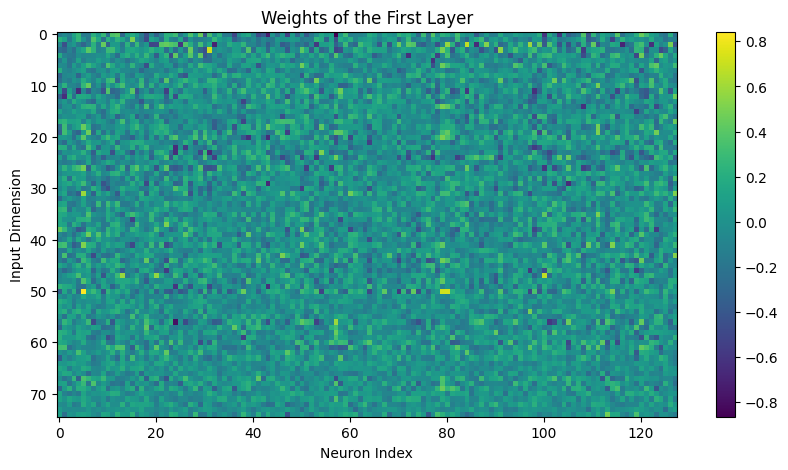

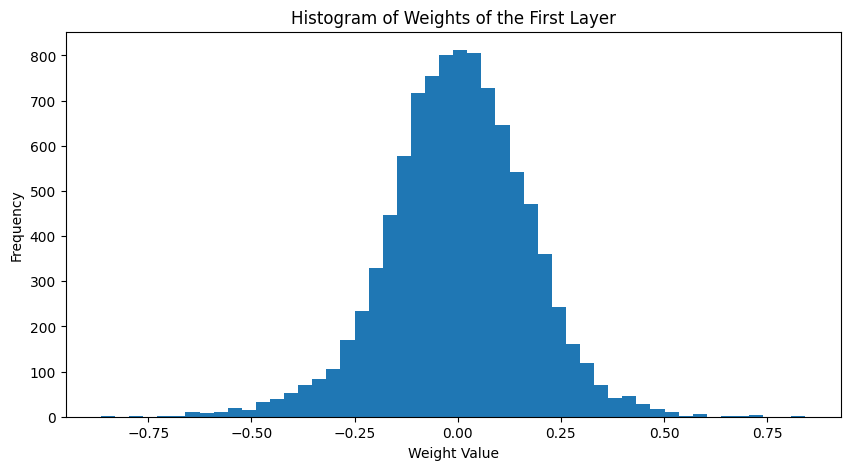

In [225]:
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Plot the weights as a heatmap
plt.figure(figsize=(10, 5))
plt.imshow(weights, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Weights of the First Layer')
plt.xlabel('Neuron Index')
plt.ylabel('Input Dimension')
plt.show()

# Plot the weights as histograms
plt.figure(figsize=(10, 5))
plt.hist(weights.flatten(), bins=50)
plt.title('Histogram of Weights of the First Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()


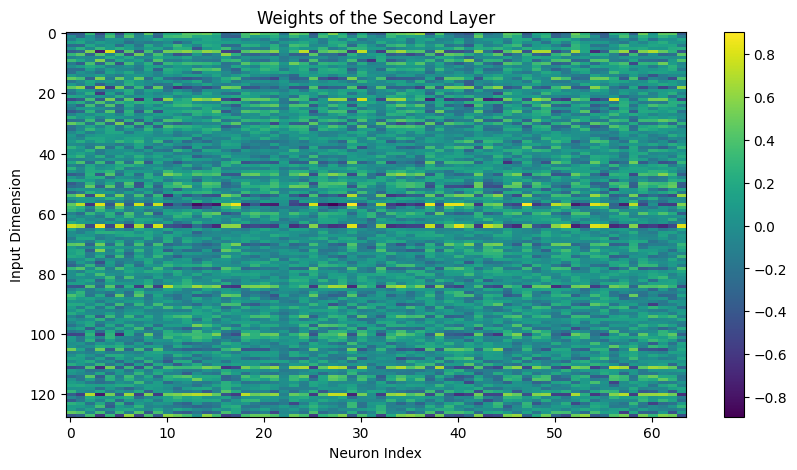

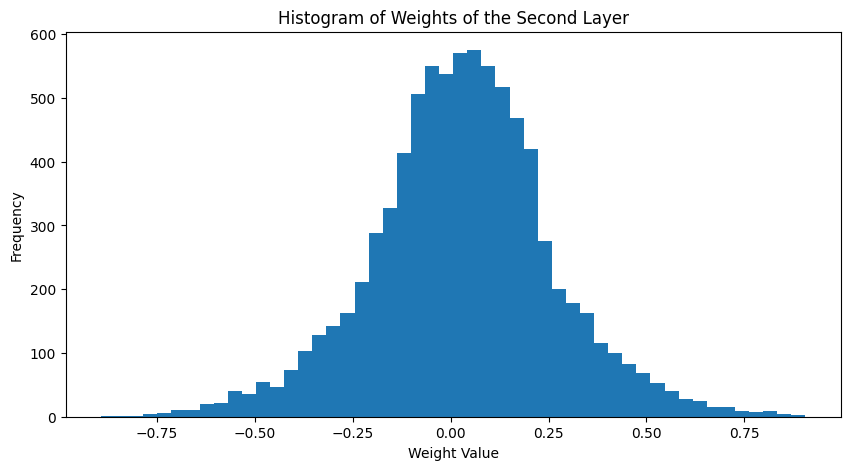

In [227]:
import matplotlib.pyplot as plt

# Get the weights of the second layer
weights = model.layers[1].get_weights()[0]

# Plot the weights as a heatmap
plt.figure(figsize=(10, 5))
plt.imshow(weights, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Weights of the Second Layer')
plt.xlabel('Neuron Index')
plt.ylabel('Input Dimension')
plt.show()

# Plot the weights as histograms
plt.figure(figsize=(10, 5))
plt.hist(weights.flatten(), bins=50)
plt.title('Histogram of Weights of the Second Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()
